# 1 Autoencoder

In [1]:
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout
from keras.utils import np_utils
from keras.models import Model
from keras.datasets import fashion_mnist
from keras import Sequential
import matplotlib.pyplot as plt
from keras.applications import VGG16

#pip install opencv-python
import cv2

import pandas as pd

Using TensorFlow backend.


In [2]:
#load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train.astype('float32') / 255., x_test.astype('float32') / 255.
x_train, x_test = np.reshape(x_train, (len(x_train), 28, 28, 1)), np.reshape(x_test, (len(x_test), 28, 28, 1))

In [3]:
#define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.125))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.125))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.125))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)          

In [4]:
#train
model.fit(x_train, x_train,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 90s 1ms/step - loss: 0.3418 - accuracy: 0.5000 - val_loss: 0.3041 - val_accuracy: 0.5026
Epoch 2/20
60000/60000 [==============================] - 89s 1ms/step - loss: 0.3085 - accuracy: 0.5032 - val_loss: 0.2976 - val_accuracy: 0.5026
Epoch 3/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.3039 - accuracy: 0.5040 - val_loss: 0.2943 - val_accuracy: 0.5035
Epoch 4/20
60000/60000 [==============================] - 88s 1ms/step - loss: 0.3014 - accuracy: 0.5044 - val_loss: 0.2936 - val_accuracy: 0.5041
Epoch 5/20
60000/60000 [==============================] - 89s 1ms/step - loss: 0.2998 - accuracy: 0.5047 - val_loss: 0.2918 - val_accuracy: 0.5040
Epoch 6/20
60000/60000 [==============================] - 89s 1ms/step - loss: 0.2986 - accuracy: 0.5049 - val_loss: 0.2901 - val_accuracy: 0.5048
Epoch 7/20
60000/60000 [==============================] - 89s 1ms/st

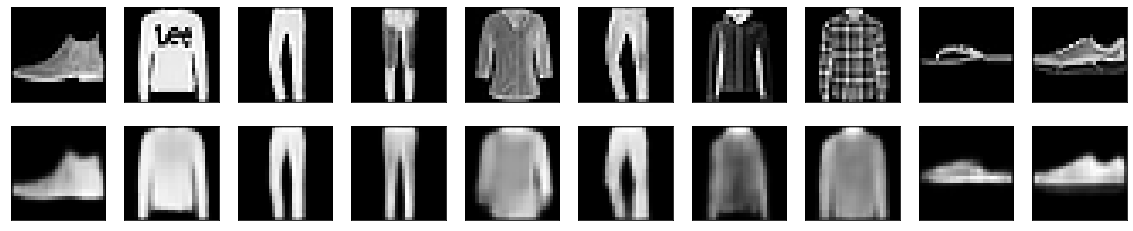

In [5]:
#show some results
decoded_imgs = model.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #reconstructed
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2.1 Deep CNN

In [6]:
#preprocess data
y_train, y_test = np_utils.to_categorical(y_train, 10), np_utils.to_categorical(y_test, 10)

In [7]:
#define model
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(4, 4), activation='relu', strides=(1, 1), padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [8]:
#train
model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 27s 444us/step - loss: 0.5758 - accuracy: 0.7908 - val_loss: 0.3783 - val_accuracy: 0.8638
Epoch 2/50
60000/60000 [==============================] - 26s 439us/step - loss: 0.3748 - accuracy: 0.8644 - val_loss: 0.3198 - val_accuracy: 0.8804
Epoch 3/50
60000/60000 [==============================] - 26s 441us/step - loss: 0.3261 - accuracy: 0.8813 - val_loss: 0.3151 - val_accuracy: 0.8841
Epoch 4/50
60000/60000 [==============================] - 26s 440us/step - loss: 0.3006 - accuracy: 0.8898 - val_loss: 0.2805 - val_accuracy: 0.8975
Epoch 5/50
60000/60000 [==============================] - 26s 440us/step - loss: 0.2766 - accuracy: 0.8972 - val_loss: 0.2649 - val_accuracy: 0.9036
Epoch 6/50
60000/60000 [==============================] - 26s 439us/step - loss: 0.2614 - accuracy: 0.9035 - val_loss: 0.2561 - val_accuracy: 0.9060
Epoch 7/50
60000/60000 [==============================] 

In [9]:
#print model accuracy
print('model accuracy on training set: ' + str(model.evaluate(x_train, y_train)[1]))
print('model accuracy on test set: ' + str(model.evaluate(x_test, y_test)[1]))

60000/60000 [==============================] - 7s 120us/step
model accuracy on training set: 0.9860333204269409
10000/10000 [==============================] - 1s 119us/step
model accuracy on test set: 0.9251000285148621


# 2.2 Transfer Learning

In [10]:
#resize img to 32x32(smallest size VGG16 would accept) and convert gray scale to RGB(VGG16 doesn't accept gray scale)
xx_train = [cv2.cvtColor(cv2.resize(im, (32,32)), cv2.COLOR_GRAY2BGR) for im in x_train]
xx_test = [cv2.cvtColor(cv2.resize(im, (32,32)), cv2.COLOR_GRAY2BGR) for im in x_test]
xx_train = np.concatenate([arr[np.newaxis] for arr in xx_train])
xx_test = np.concatenate([arr[np.newaxis] for arr in xx_test])

In [11]:
#define model
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))
conv_base.trainable = False

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
#train
model.fit(xx_train, y_train, batch_size=256, epochs=20, validation_data=(xx_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 160s 3ms/step - loss: 1.1389 - accuracy: 0.6788 - val_loss: 0.7676 - val_accuracy: 0.7629
Epoch 2/20
60000/60000 [==============================] - 161s 3ms/step - loss: 0.6753 - accuracy: 0.7835 - val_loss: 0.6360 - val_accuracy: 0.7870
Epoch 3/20
60000/60000 [==============================] - 161s 3ms/step - loss: 0.5886 - accuracy: 0.8043 - val_loss: 0.5765 - val_accuracy: 0.8069
Epoch 4/20
60000/60000 [==============================] - 162s 3ms/step - loss: 0.5436 - accuracy: 0.8159 - val_loss: 0.5449 - val_accuracy: 0.8140
Epoch 5/20
60000/60000 [==============================] - 164s 3ms/step - loss: 0.5140 - accuracy: 0.8231 - val_loss: 0.5202 - val_accuracy: 0.8201
Epoch 6/20
60000/60000 [==============================] - 162s 3ms/step - loss: 0.4929 - accuracy: 0.8296 - val_loss: 0.5012 - val_accuracy: 0.8243
Epoch 7/20
60000/60000 [==============================] - 162s

In [13]:
#print model accuracy
print('model accuracy on training set: ' + str(model.evaluate(xx_train, y_train)[1]))
print('model accuracy on test set: ' + str(model.evaluate(xx_test, y_test)[1]))

60000/60000 [==============================] - 157s 3ms/step
model accuracy on training set: 0.8591333627700806
10000/10000 [==============================] - 26s 3ms/step
model accuracy on test set: 0.8475000262260437


# 3.1 RNN

In [14]:
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Embedding

In [15]:
#load data
text_data = pd.read_csv('tweets_with_labels.csv',sep='\t')
text_data.head()

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [16]:
#preporcess
clean_text=[]
for tweet in text_data['tweet']:
    tmp = (re.sub('[^a-zA-Z]', ' ', tweet))
    tmp = re.sub(r'\s+', ' ', tmp)
    clean_text.append(re.sub(r"\s+[a-zA-Z]\s+", ' ', tmp))
clean_text=np.array(clean_text)

In [17]:
#preprocess and split data to train and test set
x = clean_text
y = text_data.loc[:, 'k1':'k15':1]
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=233)

In [18]:
#tokenize
tokenizer = Tokenizer(num_words=1024)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
x_train = pad_sequences(x_train, maxlen=64)
x_test = pad_sequences(x_test, maxlen=64)

In [19]:
#define model
model_r = Sequential()
model_r.add(Embedding(1024, 64))
model_r.add(LSTM(64))
model_r.add(Dense(15, activation ='softmax'))
model_r.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])
model_r.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          65536     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 15)                975       
Total params: 99,535
Trainable params: 99,535
Non-trainable params: 0
_________________________________________________________________


In [20]:
#train rnn
model_r.fit(x_train, y_train ,epochs = 30, validation_data = (x_test, y_test))

C:\Users\kevin\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 58459 samples, validate on 19487 samples
Epoch 1/30
58459/58459 [==============================] - 40s 684us/step - loss: 1.7058 - accuracy: 0.6899 - val_loss: 1.4319 - val_accuracy: 0.7862
Epoch 2/30
58459/58459 [==============================] - 40s 679us/step - loss: 1.4573 - accuracy: 0.7955 - val_loss: 1.4720 - val_accuracy: 0.8019
Epoch 3/30
58459/58459 [==============================] - 40s 683us/step - loss: 1.5417 - accuracy: 0.7884 - val_loss: 1.5769 - val_accuracy: 0.7910
Epoch 4/30
58459/58459 [==============================] - 40s 686us/step - loss: 1.6208 - accuracy: 0.7892 - val_loss: 1.6289 - val_accuracy: 0.7924
Epoch 5/30
58459/58459 [==============================] - 40s 683us/step - loss: 1.6891 - accuracy: 0.7869 - val_loss: 1.7256 - val_accuracy: 0.7909
Epoch 6/30
58459/58459 [==============================] - 40s 689us/step - loss: 1.7910 - accuracy: 0.7827 - val_loss: 1.8060 - val_accuracy: 0.7741
Epoch 7/30
58459/58459 [==============================] 

In [21]:
#print model accuracy
print('model accuracy on training set: ' + str(model_r.evaluate(x_train, y_train)[1]))
print('model accuracy on test set: ' + str(model_r.evaluate(x_test, y_test)[1]))

58459/58459 [==============================] - 10s 174us/step
model accuracy on training set: 0.7216681838035583
19487/19487 [==============================] - 3s 174us/step
model accuracy on test set: 0.7124236822128296


# 3.2 CNN

In [22]:
from keras.layers import Conv1D, GlobalMaxPooling1D

In [23]:
#define model
model_c = Sequential()
model_c.add(Embedding(1024, 64))
model_c.add(Conv1D(64, kernel_size = 5, padding='same', activation='relu', strides=1))
model_c.add(GlobalMaxPooling1D())
model_c.add(Dropout(0.3))
model_c.add(Dense(64,activation='relu'))
model_c.add(Dense(15,activation='sigmoid'))
model_c.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])
model_c.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          65536     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          20544     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 15)                975       
Total params: 91,215
Trainable params: 91,215
Non-trainable params: 0
__________________________________________________

In [24]:
#train cnn
model_c.fit(x_train, y_train ,epochs = 30, validation_data = (x_test, y_test))

C:\Users\kevin\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 58459 samples, validate on 19487 samples
Epoch 1/30
58459/58459 [==============================] - 8s 140us/step - loss: 1.4639 - accuracy: 0.7371 - val_loss: 1.1625 - val_accuracy: 0.8150
Epoch 2/30
58459/58459 [==============================] - 8s 139us/step - loss: 1.1895 - accuracy: 0.8063 - val_loss: 1.1396 - val_accuracy: 0.8113
Epoch 3/30
58459/58459 [==============================] - 8s 137us/step - loss: 1.1513 - accuracy: 0.8096 - val_loss: 1.1296 - val_accuracy: 0.8106
Epoch 4/30
58459/58459 [==============================] - 8s 137us/step - loss: 1.1248 - accuracy: 0.8120 - val_loss: 1.1238 - val_accuracy: 0.8122
Epoch 5/30
58459/58459 [==============================] - 8s 136us/step - loss: 1.1061 - accuracy: 0.8153 - val_loss: 1.1195 - val_accuracy: 0.8121
Epoch 6/30
58459/58459 [==============================] - 8s 136us/step - loss: 1.0893 - accuracy: 0.8179 - val_loss: 1.1217 - val_accuracy: 0.8117
Epoch 7/30
58459/58459 [==============================] - 8s 1

In [25]:
#print model accuracy
print('model accuracy on training set: ' + str(model_c.evaluate(x_train, y_train)[1]))
print('model accuracy on test set: ' + str(model_c.evaluate(x_test, y_test)[1]))

58459/58459 [==============================] - 2s 30us/step
model accuracy on training set: 0.8458749055862427
19487/19487 [==============================] - 1s 30us/step
model accuracy on test set: 0.8096166849136353


# 3.3

In [26]:
from sklearn.metrics import roc_curve, auc

In [32]:
#calculate micro-average-roc
fpr_r, tpr_r, _ = roc_curve(np.array(y_test).ravel()>0, model_r.predict(x_test).ravel())
roc_auc_r = auc(fpr_r, tpr_r)

fpr_c, tpr_c, _ = roc_curve(np.array(y_test).ravel()>0, model_c.predict(x_test).ravel())
roc_auc_c = auc(fpr_c, tpr_c)

#calculate micro-average-roc (train set)
fpr_rt, tpr_rt, _ = roc_curve(np.array(y_train).ravel()>0, model_r.predict(x_train).ravel())
roc_auc_rt = auc(fpr_rt, tpr_rt)

fpr_ct, tpr_ct, _ = roc_curve(np.array(y_train).ravel()>0, model_c.predict(x_train).ravel())
roc_auc_ct = auc(fpr_ct, tpr_ct)

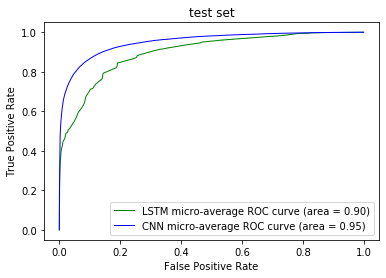

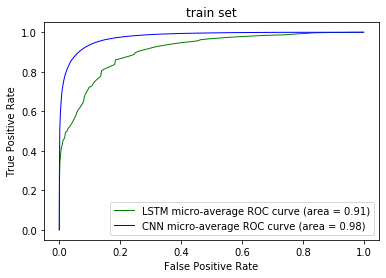

In [33]:
#plot roc curve (test set)
plt.plot(fpr_r, tpr_r,
         label='LSTM micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_r),
         color='green', linewidth=1)

plt.plot(fpr_c, tpr_c,
         label='CNN micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_c),
         color='blue', linewidth=1)

plt.title("test set")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.show()



#plot roc curve (train set)
plt.plot(fpr_rt, tpr_rt,
         label='LSTM micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_rt),
         color='green', linewidth=1)

plt.plot(fpr_ct, tpr_ct,
         label='CNN micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_ct),
         color='blue', linewidth=1)

plt.title("train set")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.show()